In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from collections import defaultdict

In [2]:
with open("two_dim_mdp_data.pkl", "rb") as file:
    data_list = pickle.load(file)

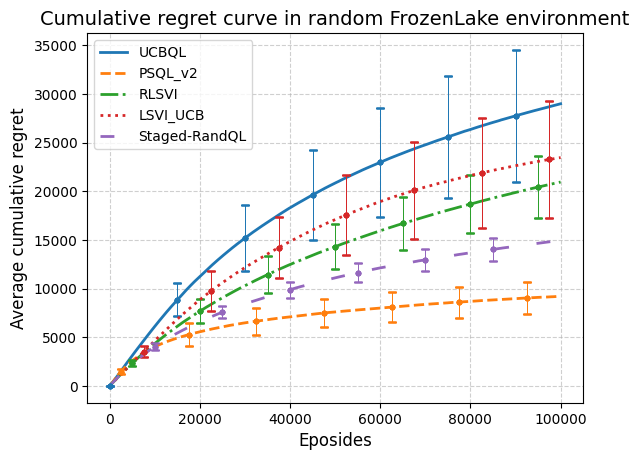

In [3]:
all_data = defaultdict(list)
for i, data in enumerate(data_list):
      algo = data['algo_name']
      if algo != 'PSQL_v1' and algo != 'PSQL_v3':
        all_data[algo].append(data['cumulative_regret'])

line_styles = ["-", "--", "-.", ":", (0, (5,10))]
# algo_linestyles = {list(all_data.keys())[i]:line_styles[i] for i in range(len(line_styles))}
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for i, algo in enumerate(all_data.keys()):
    regret_mean = np.mean(np.array(all_data[algo]),axis=0)
    regret_std = np.std(np.array(all_data[algo]),axis=0)
    time_steps = np.arange(len(regret_mean))

    color = colors[i % len(colors)]
    linestyle = line_styles[i % len(line_styles)]
    # Plot the average metric with a shaded area for standard deviation
    plt.plot(
        time_steps,
        regret_mean,
        label=algo,
        linestyle=linestyle,
        linewidth=2,
        color=color
    )

    # Plot error bars every 1500 steps
    step_interval = 15000
    indices = np.arange(2500* i, len(regret_mean), step_interval)
    for idx in indices:
      plt.errorbar(
          time_steps[indices],
          regret_mean[indices],
          yerr=regret_std[indices],
          fmt='o',
          capsize=3,
          elinewidth=.5,
          markersize=3,
          linestyle='none',
          color=color
      )
plt.title("Cumulative regret curve in random FrozenLake environment", fontsize=14)
plt.xlabel("Eposides", fontsize=12)
plt.ylabel("Average cumulative regret", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)

In [5]:
with open("one_dim_mdp_data.pkl", "rb") as file:
    data_list = pickle.load(file)

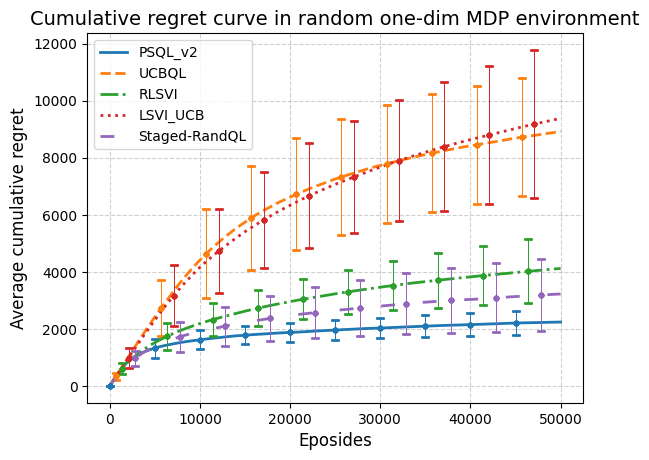

In [6]:
all_data = defaultdict(list)
for i, data in enumerate(data_list):
      algo = data['algo_name']
      if algo != 'PSQL_v1' and algo != 'PSQL_v3':
        all_data[algo].append(data['cumulative_regret'])
line_styles = ["-", "--", "-.", ":", (0, (5,10))]
algo_linestyles = {list(all_data.keys())[i]:line_styles[i] for i in range(len(line_styles))}
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for i, algo in enumerate(all_data.keys()):
    regret_mean = np.mean(np.array(all_data[algo]),axis=0)
    regret_std = np.std(np.array(all_data[algo]),axis=0)
    time_steps = np.arange(len(regret_mean))

    color = colors[i % len(colors)]
    linestyle = line_styles[i % len(line_styles)]
    # Plot the average metric with a shaded area for standard deviation
    plt.plot(
        time_steps,
        regret_mean,
        label=algo,
        linestyle=linestyle,
        linewidth=2,
        color=color
    )

    # Plot error bars every 500 steps
    step_interval = 5000
    indices = np.arange(700* i, len(regret_mean), step_interval)
    for idx in indices:
      plt.errorbar(
          time_steps[indices],
          regret_mean[indices],
          yerr=regret_std[indices],
          fmt='o',
          capsize=3,
          elinewidth=.5,
          markersize=3,
          linestyle='none',
          color=color
      )
plt.title("Cumulative regret curve in random one-dim MDP environment", fontsize=14)
plt.xlabel("Eposides", fontsize=12)
plt.ylabel("Average cumulative regret", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)